### 1. NLP
### 2. Hashing numreical + text data
### 3. sparse data

In [60]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce   
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
train_dir='E:/Knight ML Assignment/Data/train.csv'
test_dir='E:/Knight ML Assignment/Data/test.csv'

df = pd.read_csv(train_dir)
df_test= pd.read_csv(test_dir)

In [62]:
df.head(5)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


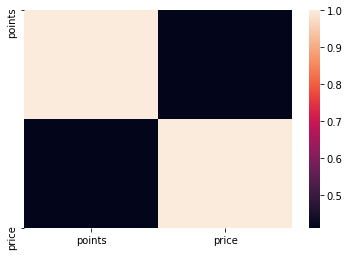

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## user_name

In [64]:
train = df.drop( ['user_name'] ,axis=1)
test = df_test.drop( ['user_name'] ,axis=1)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 11 columns):
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 6.9+ MB


## Country

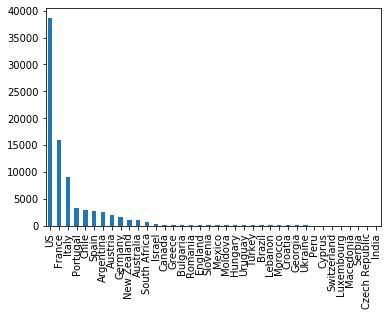

In [65]:
train['country'].value_counts().plot.bar()

In [66]:
train.drop(train[(train.country!='France') & (train.country!='Italy') & (train.country!='US')].index, inplace=True)
test.drop(test[(test.country!='France') & (test.country!='Italy') & (test.country!='US')].index, inplace=True) 

## Designation/province

In [67]:
train['designation'].value_counts()
print('----------')
print(len(train['designation'].unique()))

## categorical values making no sense

----------
19382


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63633 entries, 1 to 82656
Data columns (total 11 columns):
country               63633 non-null object
review_title          63633 non-null object
review_description    63633 non-null object
designation           43408 non-null object
points                63633 non-null int64
price                 59025 non-null float64
province              63633 non-null object
region_1              63416 non-null object
region_2              35949 non-null object
winery                63633 non-null object
variety               63633 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 5.8+ MB


In [69]:
train.drop(['designation','province','winery'],axis=1, inplace=True)
test.drop(['designation','province','winery'],axis=1, inplace=True)

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63633 entries, 1 to 82656
Data columns (total 8 columns):
country               63633 non-null object
review_title          63633 non-null object
review_description    63633 non-null object
points                63633 non-null int64
price                 59025 non-null float64
region_1              63416 non-null object
region_2              35949 non-null object
variety               63633 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 4.4+ MB


## region_1 and region_2

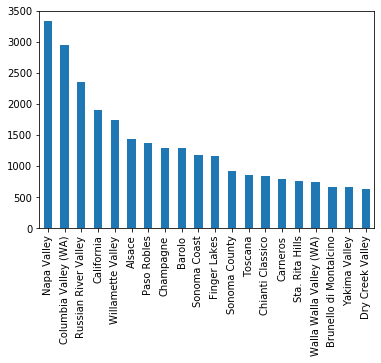

In [71]:
train['region_1'].value_counts().head(20).plot.bar()

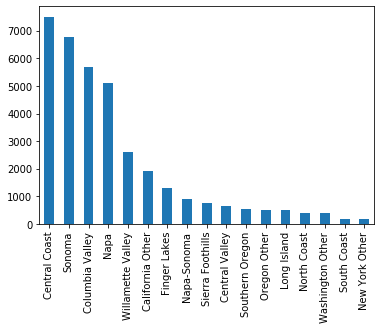

In [72]:
train['region_2'].value_counts().head(20).plot.bar()

In [73]:
train.drop(['region_1','region_2'],axis=1,inplace=True)
test.drop(['region_1','region_2'],axis=1,inplace=True)

## Removing missing values..

In [74]:
train.dropna()


,country,review_title,review_description,points,price,variety
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,89,15.0,Red Blend
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,80.0,Nebbiolo
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,22.0,Bordeaux-style White Blend
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,33.0,Malbec
6,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",91,45.0,Red Blend
...,...,...,...,...,...,...
82651,US,La Crema 2012 Chardonnay (Arroyo Seco),"Made in a drier, tarter style than the winery'...",90,30.0,Chardonnay
82653,US,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",85,21.0,Cabernet Sauvignon
82654,France,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,87,14.0,Gamay
82655,France,Château Beaumont 2011 Haut-Médoc,"An impressive wine, it already shows signs of ...",91,20.0,Bordeaux-style Red Blend


## Dealing with categorical values

In [75]:
dummies_train_country  = pd.get_dummies(train['country'])
dummies_train_country.drop(['France'],axis=1,inplace=True)

dummies_test_country  = pd.get_dummies(test['country'])
dummies_test_country.drop(['France'],axis=1,inplace=True)

train = train.join(dummies_train_country)
test = test.join(dummies_test_country)

test.drop(['country'],axis=1,inplace=True)
train.drop(['country'],axis=1,inplace=True)


In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63633 entries, 1 to 82656
Data columns (total 7 columns):
review_title          63633 non-null object
review_description    63633 non-null object
points                63633 non-null int64
price                 59025 non-null float64
variety               63633 non-null object
Italy                 63633 non-null uint8
US                    63633 non-null uint8
dtypes: float64(1), int64(1), object(3), uint8(2)
memory usage: 5.5+ MB


## scaling numerical features

In [77]:
train['points']=(train['points']-train['points'].mean())/train['points'].std()
test['points']=(test['points']-test['points'].mean())/test['points'].std()

train['price']=(train['price']-train['price'].mean())/train['price'].std()
test['price']=(test['price']-test['price'].mean())/test['price'].std()

In [78]:
train.head(7)

,review_title,review_description,points,price,variety,Italy,US
1,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,0.086640,-0.538004,Red Blend,0,1
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,1.711035,0.863237,Nebbiolo,1,0
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,-0.563117,-0.387101,Bordeaux-style White Blend,0,0
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",-0.238238,-0.149968,Malbec,0,0
6,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",0.736398,0.108723,Red Blend,0,1
7,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"High-toned red fruit stars in this wine, a nic...",0.411519,0.216510,Zinfandel,0,1
8,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",0.736398,0.173395,Pinot Noir,0,1


In [79]:
train.drop(['review_title'],axis=1,inplace=True)
test.drop(['review_title'],axis=1,inplace=True)

In [80]:
train.head(7)

,review_description,points,price,variety,Italy,US
1,This wine is near equal parts Syrah and Merlot...,0.086640,-0.538004,Red Blend,0,1
2,Barolo Conca opens with inky dark concentratio...,1.711035,0.863237,Nebbiolo,1,0
3,It's impressive what a small addition of Sauvi...,-0.563117,-0.387101,Bordeaux-style White Blend,0,0
4,"This ripe, sweet wine is rich and full of drie...",-0.238238,-0.149968,Malbec,0,0
6,"Half Syrah and half Cabernet Sauvignon, with 4...",0.736398,0.108723,Red Blend,0,1
7,"High-toned red fruit stars in this wine, a nic...",0.411519,0.216510,Zinfandel,0,1
8,"Displaying typical McMinnville AVA subtlety, t...",0.736398,0.173395,Pinot Noir,0,1


##  review_description
 
 #### converting text features into vectors

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix


vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', stop_words='english')

X_Train_vec = vect.fit_transform(train['review_description'])
X_Test_vec = vect.transform(test['review_description'])

## hashing numerical and text feature

In [82]:
# points=np.array(train['points'])
# price=np.array(train['price'])
# italy=np.array(train['Italy'])
# us=np.array(train['US'])

X_numerical=np.array(train[['points','price','Italy','US']])

# points_test=np.array(test['points'])
# price_test=np.array(test['price'])
# italy_test=np.array(test['Italy'])
# us_test=np.array(test['US'])



X= hstack([X_Train_vec, csr_matrix(X_numerical)], 'csr')
Y=train['variety']


#X= hstack([X_Train_vec, csr_matrix(X_numerical)], 'csr')



In [43]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, random_state = 10)

## XGboost model + Hyperparametre tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
classifier=xgboost.XGBClassifier()

In [45]:
params={
 "learning_rate"    : [0.05, 0.10, 0.20, 0.25, 0.30,0.50] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [100,300,500,700,800,1000]
    
}

In [46]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [47]:
random_search.fit(X_Train, Y_Train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed: 80.4min remaining: 102.3min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed: 144.4min remaining: 36.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 217.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                           

In [51]:
predictions = random_search.predict(X_Test)
print("Confusion Matrix:")
print(confusion_matrix(Y_Test, predictions))
print()
print("Classification Report")
print(classification_report(Y_Test, predictions))

Confusion Matrix:
[[ 896    2    3   51    1   11    5    0    0    2    4    0    0    0
    39   13    0    0    6    0    2    0    4    0    0    0]
 [   6  101    0    0    1   48    0    1    0    0    0    0    0    0
     1    0    0    1    4    0   27    0    0    0    2    0]
 [  19    0   66   37    0    2    1    0    0    0    3    0    0    0
    35    4    0    0    6    0    0    0    7    0    0    6]
 [  16    0    1  942    0    8    0    0    0    5   17    0    0    0
    98   31    2    0    3    2    0    0   34    0    0   31]
 [   1    1    0    0  140   41    0    0    0    0    0    0    0    0
    17    0    0    0    7    0    2   12    0    0    1    0]
 [   4    3    0    4   18 1452    0    2    0    0    0    0    5    5
    14    0    0   12    0    0   15   16    0    0    7    1]
 [  49    0    0    0    0    3  101    0    0    0    0    0    0    0
    18    1    0    0   14    0    0    0    0    0    1    0]
 [   0    2    0    0    0   20    0 

## Hashing test set

In [52]:
X_numerical_test=np.array(test[['points','price','Italy','US']])
X_TEST= hstack([X_Test_vec, csr_matrix(X_numerical_test)], 'csr')

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
# for learning_rate in learning_rates:
#     gb = GradientBoostingClassifier(n_estimators=1000, learning_rate = learning_rate, max_depth = 9, random_state = 0)
#     gb.fit(X_Train, Y_Train)
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(gb.score(X_Train, Y_Train)))
#     print("Accuracy score (validation): {0:.3f}".format(gb.score(X_Test, Y_Test)))
#     print()

In [ ]:
# gb = GradientBoostingClassifier(n_estimators=1100, learning_rate = 0.25, max_depth =7 , random_state = 0)
# gb.fit(X_Train, Y_Train)
# predictions = gb.predict(X_Test)

# print("Confusion Matrix:")
# print(confusion_matrix(Y_Test, predictions))
# print()
# print("Classification Report")
# print(classification_report(Y_Test, predictions))

In [54]:
Final_pred=random_search.predict(X_TEST)
test['variety']=Final_pred

In [55]:
test.to_csv('submission.csv')